In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
from metroscore.network_builder import *
from shapely.geometry import Point, LineString

%config InlineBackend.figure_format = 'retina'

In [43]:
G = build_road_network(region="New York City, NY")

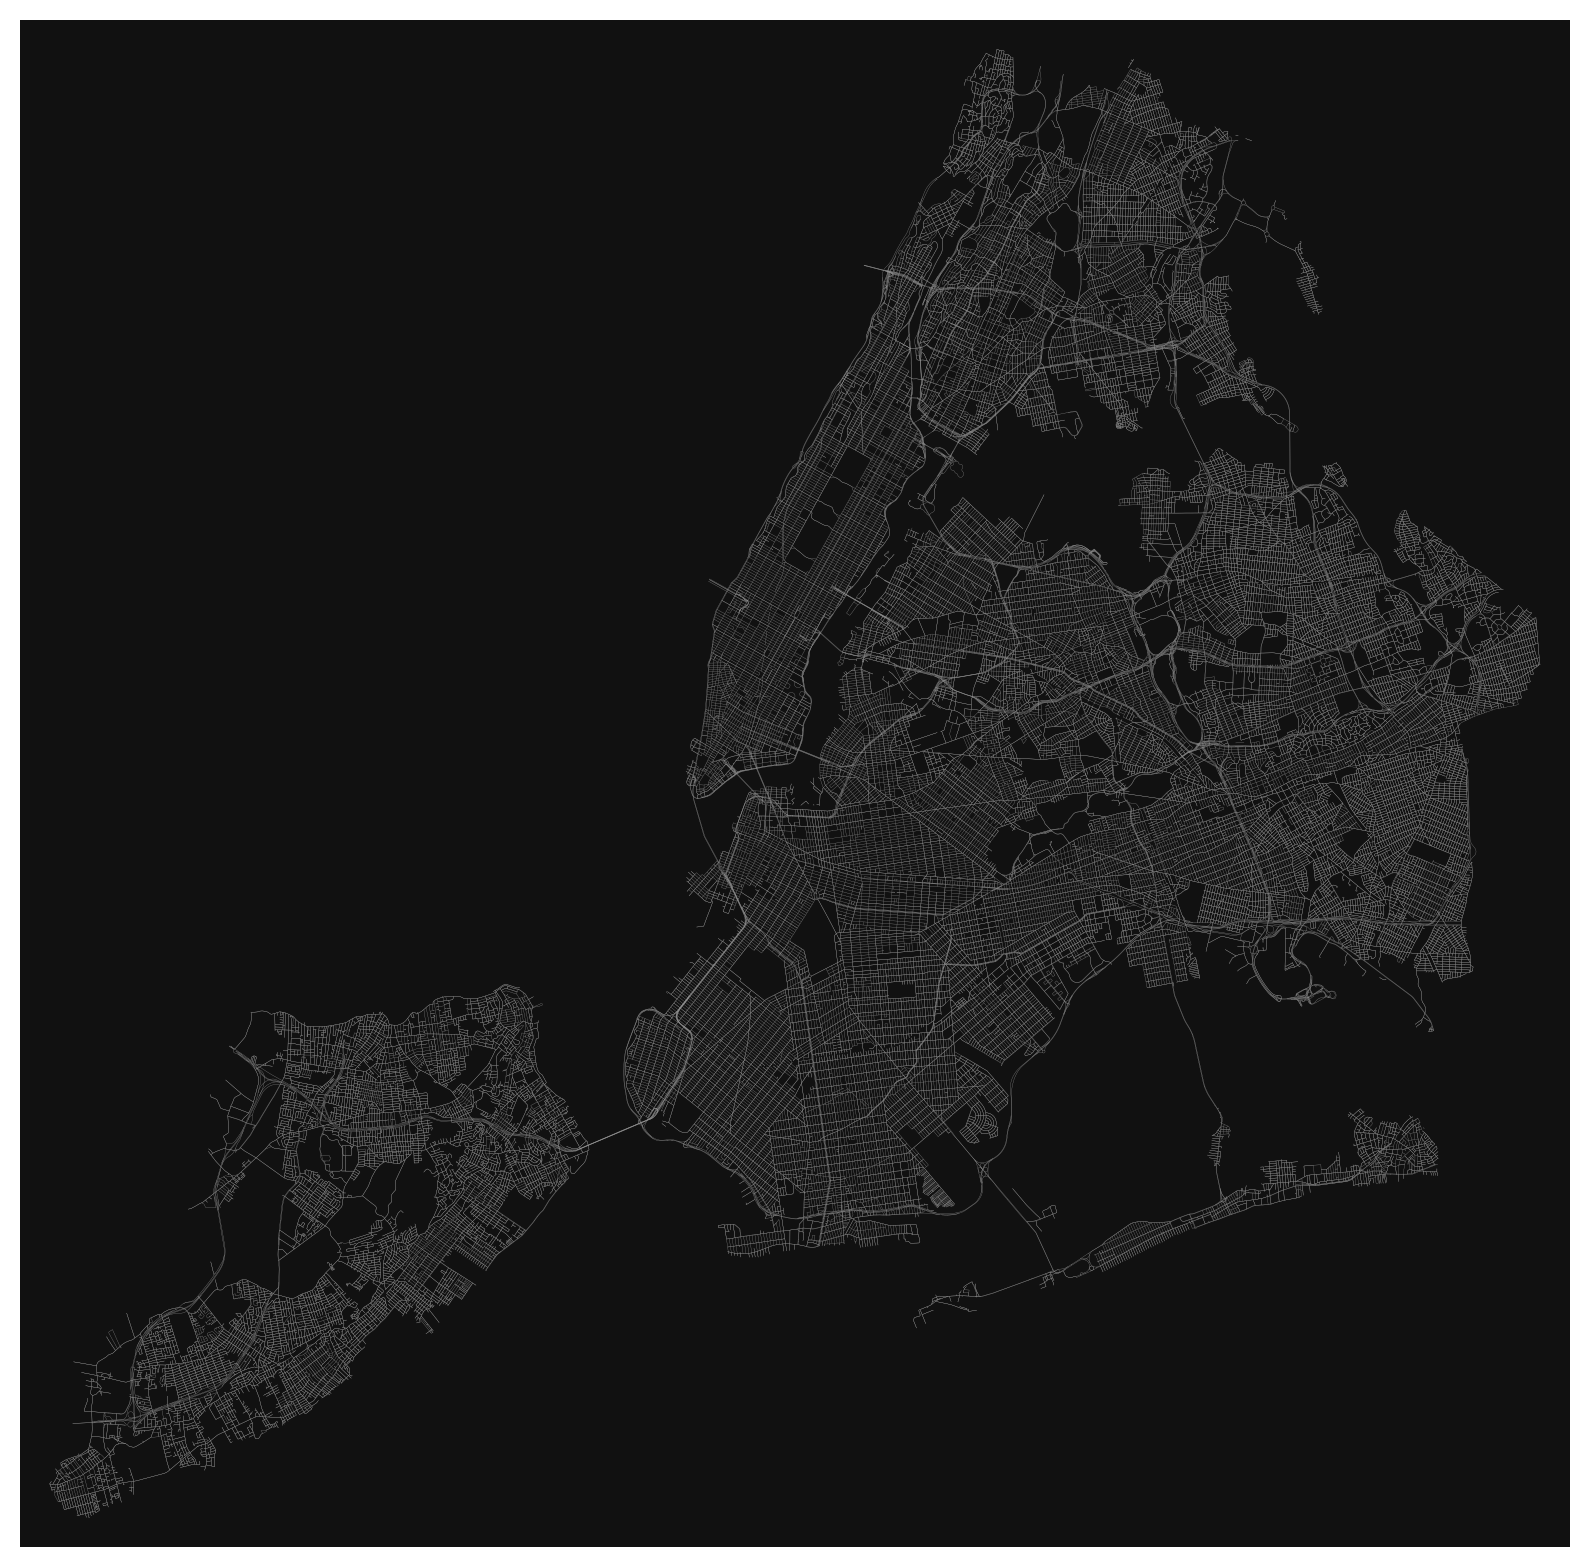

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [46]:
ox.plot_graph(G, figsize=(10,10), node_size=0, edge_linewidth=0.1)

In [66]:
W = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

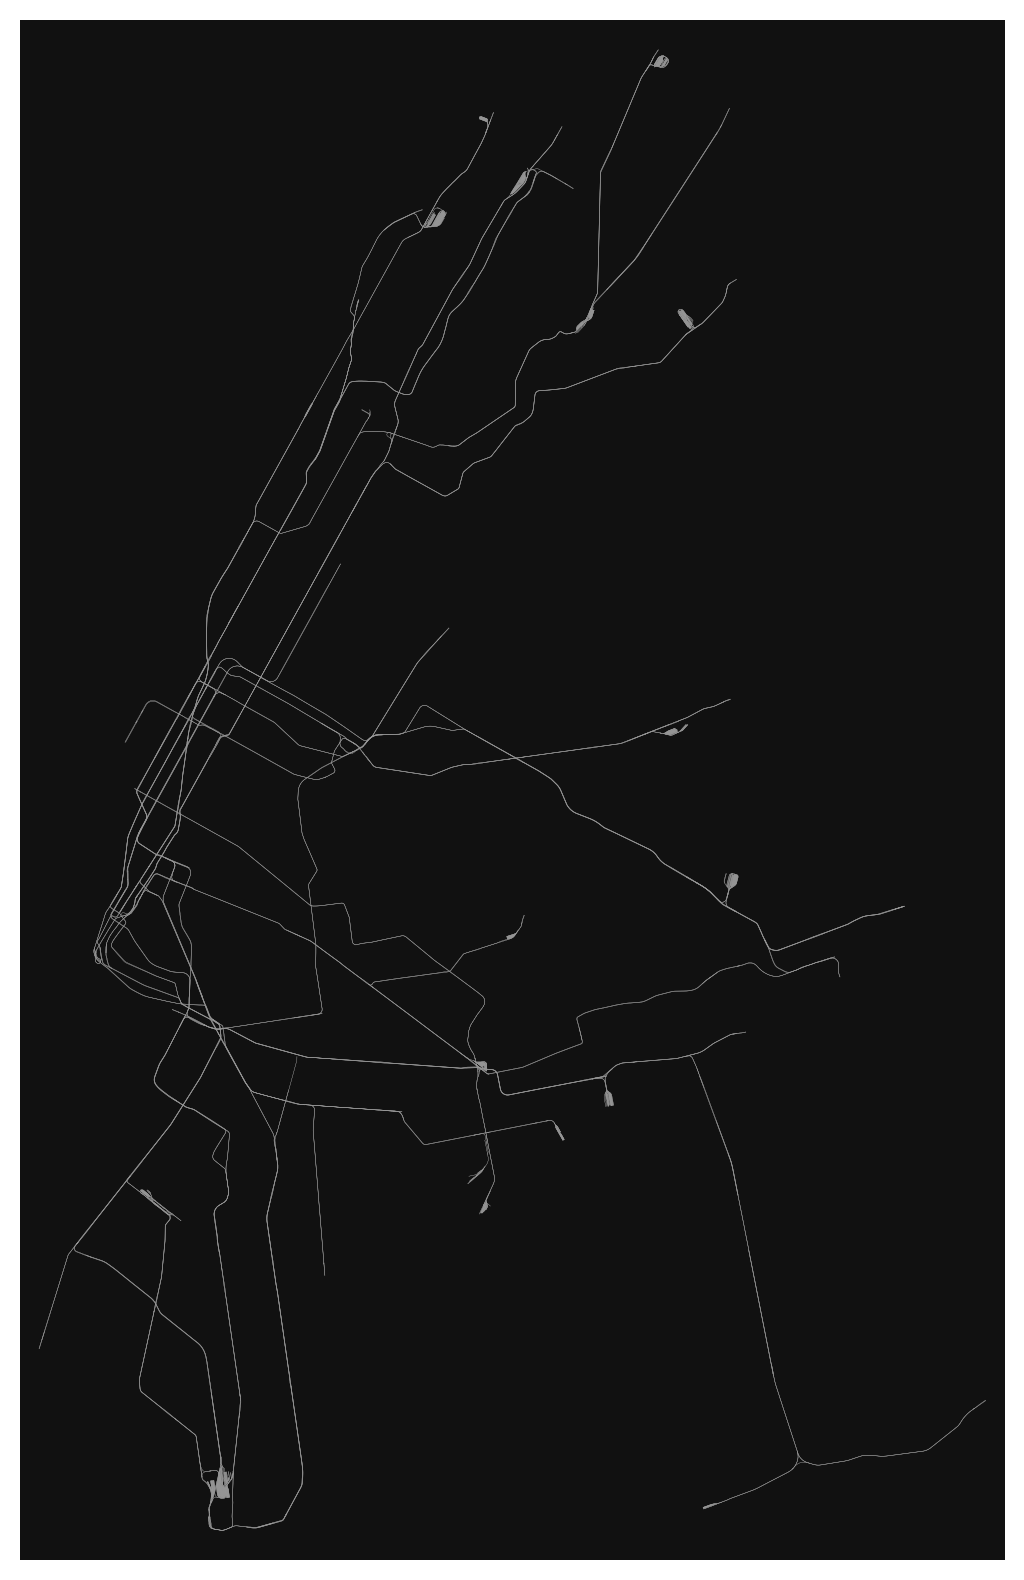

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [67]:
ox.plot_graph(W, figsize=(10,10), node_size=0, edge_linewidth=0.1)

In [68]:
n, e = ox.graph_to_gdfs(W, nodes=True, edges=True, fill_edge_geometry=True)

W = ox.graph_from_gdfs(n, e)

In [69]:
any_given_edge = list(W.edges(data=True))[0]
any_given_edge

(42507216,
 3514377668,
 {'osmid': 344690669,
  'service': 'crossover',
  'oneway': False,
  'reversed': True,
  'length': 65.292,
  'geometry': <LINESTRING (-73.962 40.658, -73.961 40.658)>})

In [70]:
list(any_given_edge[2]["geometry"].coords)

[(-73.9616295, 40.6583924), (-73.9614902, 40.6578148)]

In [72]:
W.nodes(data=True)[any_given_edge[0]]

{'y': 40.6583924, 'x': -73.9616295, 'street_count': 3}

In [73]:
p = Point(any_given_edge[2]["geometry"].coords[1])
p = Point(p.x + 0.001, p.y)

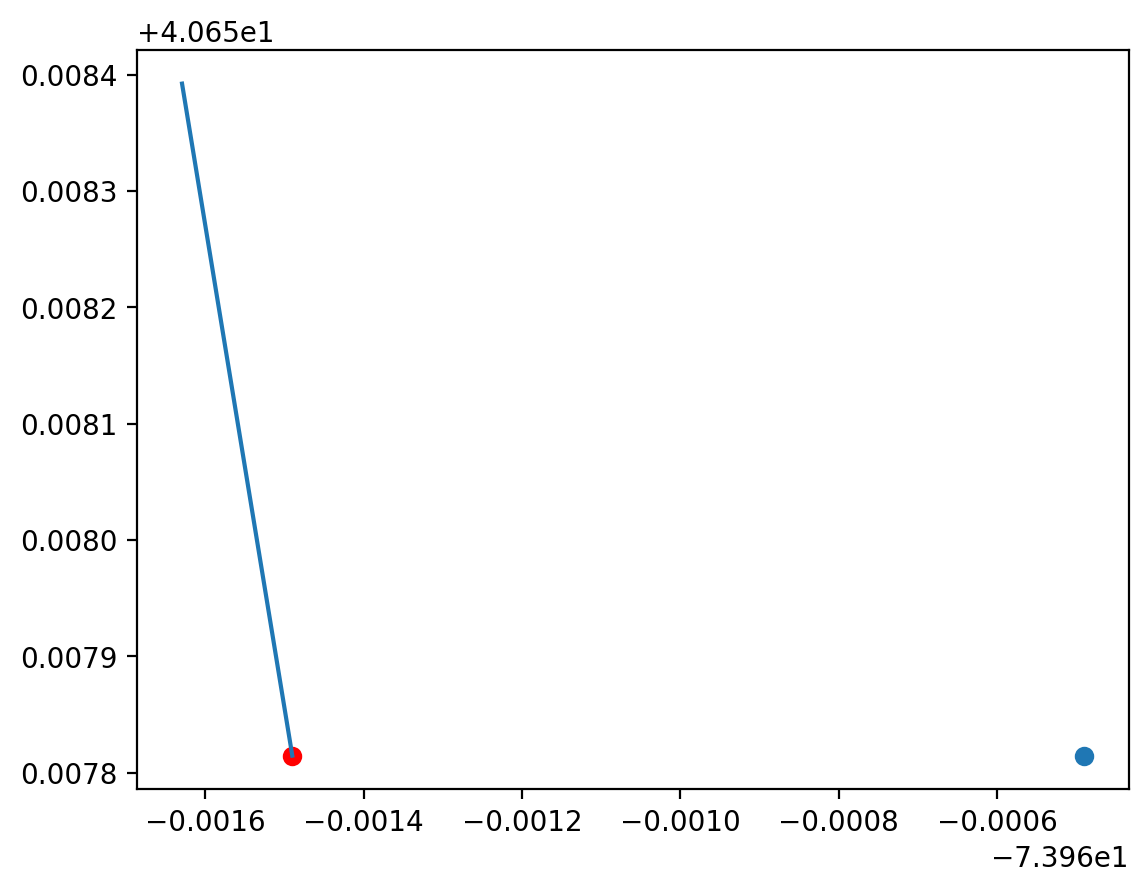

In [74]:
plt.scatter(p.x, p.y)
plt.plot(*any_given_edge[2]["geometry"].coords.xy)
proj = any_given_edge[2]["geometry"].interpolate(any_given_edge[2]["geometry"].project(p, normalized=True), normalized=True)
plt.scatter(proj.x, proj.y, label="Projected - Shapely", c='red')

In [75]:
proj.xy

(array('d', [-73.9614902]), array('d', [40.6578148]))

In [76]:
from metroscore.utils import *

In [78]:
project_node_to_edge(node=W.nodes(data=True)[any_given_edge[0]], edge=any_given_edge).xy

(array('d', [-73.9616295]), array('d', [40.6583924]))

In [79]:
list(W.nodes(data=True))[0]

(42507216, {'y': 40.6583924, 'x': -73.9616295, 'street_count': 3})

In [80]:
G_proj = ox.project_graph(G, to_latlong=True)
W_proj = ox.project_graph(W, to_latlong=True)

In [81]:
G_proj.graph['crs'] == W_proj.graph['crs']

True

In [18]:
Xs = []
Ys = []
for _id, node in G_proj.nodes(data=True):
    print(_id, node)
    if (node['x'] != node['lon']) or (node['y'] != node['lat']):
        print("Mismatched location!")
    Xs.append(node['x'])
    Ys.append(node['y'])

261509145 {'y': 41.5059318, 'x': -73.9794824, 'highway': 'turning_circle', 'street_count': 1, 'lon': -73.9794824, 'lat': 41.5059318}
261509152 {'y': 41.50543, 'x': -73.977876, 'street_count': 3, 'lon': -73.977876, 'lat': 41.50543}
261855051 {'y': 41.5050907, 'x': -73.9780389, 'street_count': 3, 'lon': -73.9780389, 'lat': 41.5050907}
261835049 {'y': 41.5063306, 'x': -73.9776159, 'highway': 'traffic_signals', 'street_count': 4, 'lon': -73.9776159, 'lat': 41.5063306}
261517184 {'y': 41.4980188, 'x': -73.9718302, 'street_count': 3, 'lon': -73.9718302, 'lat': 41.4980188}
261829830 {'y': 41.498329, 'x': -73.9726799, 'street_count': 3, 'lon': -73.9726799, 'lat': 41.498329}
261915390 {'y': 41.496574, 'x': -73.97276, 'street_count': 3, 'lon': -73.97276, 'lat': 41.496574}
10979240465 {'y': 41.4994449, 'x': -73.9709188, 'street_count': 3, 'lon': -73.9709188, 'lat': 41.4994449}
261519631 {'y': 41.511838, 'x': -73.982081, 'street_count': 1, 'lon': -73.982081, 'lat': 41.511838}
261848698 {'y': 41.51

In [19]:
len(Xs), len(Ys)

(501, 501)

In [20]:
list(dict(G.nodes(data=True)).values())[0]

{'y': 41.5059318,
 'x': -73.9794824,
 'highway': 'turning_circle',
 'street_count': 1}

In [21]:
nn, dist = ox.distance.nearest_nodes(G=W_proj, X=Xs, Y=Ys, return_dist=True)

In [22]:
dict(zip(G_proj.nodes, zip(nn, dist)))

{261509145: (261509145, 0.0),
 261509152: (261509152, 0.0),
 261855051: (261855051, 0.0),
 261835049: (261835049, 0.0),
 261517184: (261517184, 0.0),
 261829830: (261829830, 0.0),
 261915390: (261915390, 0.0),
 10979240465: (10979240465, 0.0),
 261519631: (261519631, 0.0),
 261848698: (261848698, 0.0),
 261526707: (7811462788, 41.604853502260134),
 3659100605: (3659100605, 0.0),
 261527681: (261527681, 0.0),
 261527699: (261527699, 0.0),
 261854999: (261854999, 0.0),
 261847038: (261847038, 0.0),
 261528445: (261528445, 0.0),
 261824315: (261824315, 0.0),
 261538925: (10291413995, 39.55947818805949),
 261950507: (261950507, 0.0),
 261544065: (261544065, 0.0),
 261544073: (261544073, 0.0),
 261880559: (261880559, 0.0),
 261880539: (261880539, 0.0),
 261920625: (261920625, 0.0),
 261548361: (261548361, 0.0),
 261548363: (261548363, 0.0),
 261926950: (261926950, 0.0),
 8810464202: (8810464202, 0.0),
 261548422: (261548422, 0.0),
 261803586: (261803586, 0.0),
 261792248: (261792248, 0.0),


In [82]:
get_node_to_node_mapping(G, W)

{39076461: 3282112442,
 42854803: 3282112442,
 274283981: 3282112442,
 39076490: 7647540604,
 277672046: 7647540604,
 277672005: 7647540604,
 39076504: 7647540604,
 462124701: 7647540604,
 462122450: 7647540604,
 42421728: 4460384928,
 42435337: 4460384928,
 42421731: 4460384928,
 42432736: 4460384928,
 42437916: 4460384928,
 42432737: 4460384928,
 42421737: 4460384928,
 42437917: 4460384928,
 42421741: 4460384928,
 42432756: 4460384928,
 1061531654: 4460384928,
 42421745: 4460384928,
 42421749: 4460384928,
 11803957852: 4460384928,
 42421751: 4460384928,
 42431118: 4460384928,
 42432764: 4460384928,
 42421769: 7657973032,
 42443347: 7624158668,
 42421772: 7624158668,
 42442469: 7657973032,
 42421775: 7624158668,
 11655721345: 7624158668,
 42428653: 7624158668,
 42421776: 7624158668,
 42431024: 7624158668,
 42431019: 7624158668,
 42421778: 7624158668,
 42422592: 7624158668,
 42441587: 7624158668,
 42421783: 6686062944,
 42443522: 6686062944,
 42427782: 6686062944,
 42429174: 6686062944

In [85]:
W.get_edge_data(any_given_edge[0], any_given_edge[1])

{0: {'osmid': 344690669,
  'service': 'crossover',
  'oneway': False,
  'reversed': True,
  'length': 65.292,
  'geometry': <LINESTRING (-73.962 40.658, -73.961 40.658)>}}

In [25]:
from geopy.distance import distance, lonlat

In [26]:
(G.nodes[any_given_edge[0]]['x'], G.nodes[any_given_edge[0]]['y'])

(-73.9794824, 41.5059318)

In [27]:
distance(lonlat(G.nodes[any_given_edge[0]]['x'], G.nodes[any_given_edge[0]]['y']), lonlat(G.nodes[any_given_edge[1]]['x'], G.nodes[any_given_edge[1]]['y'])).m

145.23522670819142

In [ ]:
G_x = nx.get_node_attributes(G, "x")
G_y = nx.get_node_attributes(G, "y")
W_x = nx.get_node_attributes(W, "x")
W_y = nx.get_node_attributes(W, "y")

dist = distance(lonlat(G_x[n1], G_y[n1]), lonlat(O_x[n2], O_y[n2])).m

In [86]:
import cProfile

In [87]:
cProfile.run("merge_graphs(G, W)")

         53471339 function calls (53211947 primitive calls) in 12.465 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amax)
       24    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(append)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argsort)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_2d)
       12    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(bincount)
       54    0.000    0.000    0.017    0.000 <__array_function__ internals>:177(concatenate)
      145    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(cumsum)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(delete)
       1

In [115]:
merged_W = merge_graphs(W, other=G)

In [118]:
ox.graph_to_gdfs(W, nodes=True, edges=False)

,y,x,street_count,ref,geometry
osmid,,,,,
42507216,40.658392,-73.961630,3,NaN,POINT (-73.96163 40.65839)
3514377668,40.657815,-73.961490,3,NaN,POINT (-73.96149 40.65781)
3514445036,40.658617,-73.961665,3,NaN,POINT (-73.96166 40.65862)
1413569906,40.607358,-73.957435,3,NaN,POINT (-73.95744 40.60736)
42795301,40.659225,-73.829617,3,NaN,POINT (-73.82962 40.65922)
...,...,...,...,...,...
10565440626,40.694567,-73.987201,3,NaN,POINT (-73.98720 40.69457)
10565440623,40.694506,-73.987180,4,NaN,POINT (-73.98718 40.69451)
10565440630,40.694595,-73.987200,3,NaN,POINT (-73.98720 40.69459)


In [119]:
ox.graph_to_gdfs(merged_W, nodes=True, edges=False)

,y,x,street_count,lon,lat,merge_provenance,ref,geometry
osmid,,,,,,,,
42507216,40.658345,-73.961542,3,-73.961542,40.658345,42536166.0,NaN,POINT (-73.96154 40.65835)
3514377668,40.657815,-73.961490,3,NaN,NaN,NaN,NaN,POINT (-73.96149 40.65781)
3514445036,40.658617,-73.961665,3,NaN,NaN,NaN,NaN,POINT (-73.96166 40.65862)
1413569906,40.607358,-73.957435,3,NaN,NaN,NaN,NaN,POINT (-73.95744 40.60736)
42795301,40.659225,-73.829617,3,NaN,NaN,NaN,NaN,POINT (-73.82962 40.65922)
...,...,...,...,...,...,...,...,...
10565440626,40.694567,-73.987201,3,NaN,NaN,NaN,NaN,POINT (-73.98720 40.69457)
10565440623,40.694506,-73.987180,4,NaN,NaN,NaN,NaN,POINT (-73.98718 40.69451)
10565440630,40.694595,-73.987200,3,NaN,NaN,NaN,NaN,POINT (-73.98720 40.69459)
